<a href="https://colab.research.google.com/github/Tolulopeelijah/Cats-vs-Dog-classifier/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tolulopeelijah","key":"210a7e92a996c2d01970b24cf756b16f"}'}

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:35<00:00, 24.4MB/s]
100% 812M/812M [00:35<00:00, 24.0MB/s]


In [ ]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
 ! unzip train.zip
 ! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os, shutil
import pandas as pd
import numpy as np
from PIL import Image
from random import sample
from math import ceil

In [ ]:
print(len(os.listdir('./train')))
print(len(os.listdir('./test1')))

25000
12500


In [ ]:
path = './data/'
subpaths = ['train/', 'test/']
subsub = ['cats', 'dogs']
for subpath in subpaths:
  for sub in subsub:
    dir = path+subpath+sub
    os.makedirs(dir, exist_ok = True)

In [ ]:
init_dest_path = './train/'
dest_path = './data/train/'
#  using 80% of the training set for the training and the other twenty for validation
for img in sample(os.listdir(init_dest_path), ceil(0.8 * len(os.listdir(init_dest_path)))):
  init_dest = init_dest_path + img
  image_class = 'dogs' if img[:3] == 'dog' else 'cats' if img[:3] == 'cat' else 'none'
  if image_class != 'none':
    fin_dest = dest_path + image_class
  shutil.move(init_dest, fin_dest)


for img in (os.listdir(init_dest_path)):
  init_dest = init_dest_path + img
  image_class = 'dogs' if img[:3] == 'dog' else 'cats' if img[:3] == 'cat' else 'none'
  if image_class != 'none':
    fin_dest = './data/test/' + image_class
  shutil.move(init_dest, fin_dest)

In [ ]:
print(f'length of cats in train: {len(os.listdir("./data/train/cats/"))}')
print(f'length of dogs in train: {len(os.listdir("./data/train/dogs"))}')
print(f'length of cats in validation: {len(os.listdir("./data/test/cats"))}')
print(f'length of dogs in validation: {len(os.listdir("./data/test/dogs"))}')

length of cats in train: 9998
length of dogs in train: 10002
length of cats in validation: 2502
length of dogs in validation: 2498


In [ ]:
10010 + 999 + 2490 + 2510

16009

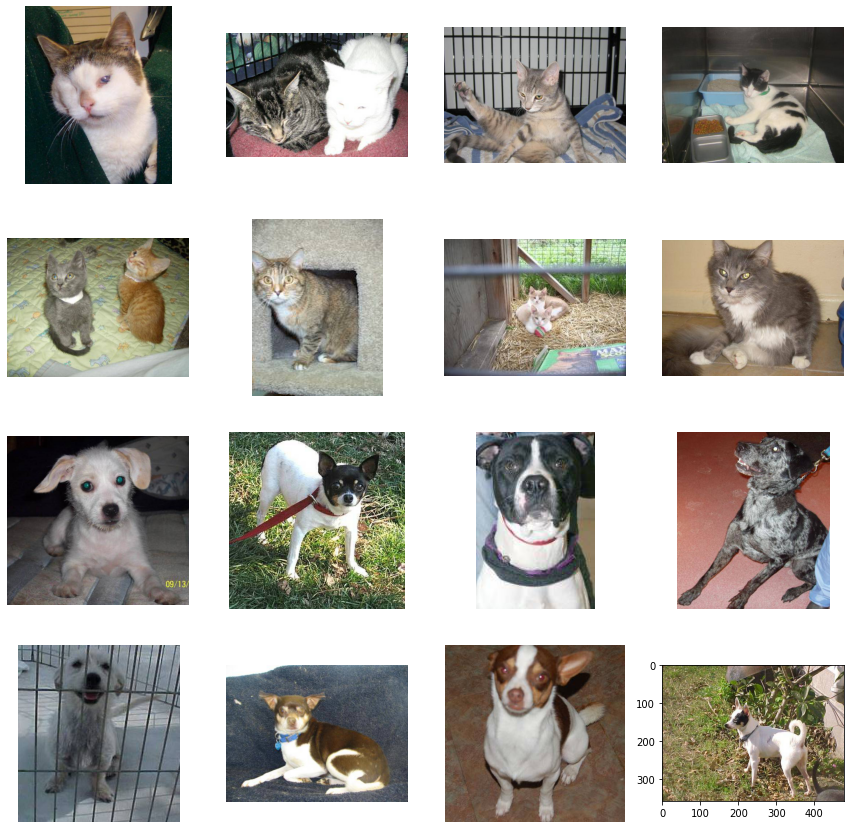

In [ ]:
path = './data/train/'
images = os.listdir('./data/train/cats')[:8] + os.listdir('./data/train/dogs')[:8]
plt.figure(figsize = (15,15))
for num, image_name in enumerate(images):
  image_path = path + 'cats/' + image_name if image_name[:3] == 'cat' else path + 'dogs/' + image_name
  img = Image.open(image_path)
  im = np.asarray(img)
  plt.axis('off')
  plt.subplot(4,4, num+1)
  plt.imshow(im)

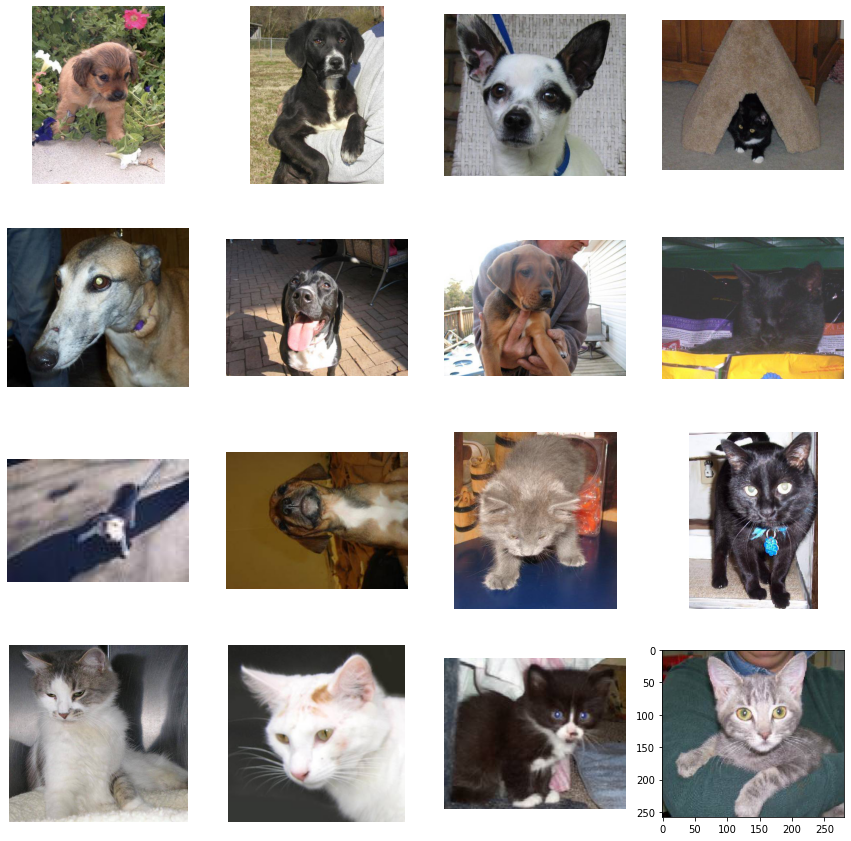

In [ ]:
path = './test1/'
plt.figure(figsize = (15,15))
for num, image_name in enumerate(os.listdir(path)[:16]):
  image_path = path + image_name
  img = Image.open(image_path)
  im = np.asarray(img)
  plt.axis('off')
  plt.subplot(4,4, num+1)
  plt.imshow(im)

In [ ]:
model = keras.models.Sequential([keras.layers.Conv2D(32, (3,3), input_shape = (300, 300, 3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(500, activation = 'relu'),
                                 keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.BinaryCrossentropy(), metrics = 'accuracy')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_generator = ImageDataGenerator(rescale = 1/255)
val_data_generator = ImageDataGenerator(rescale = 1/255)

train_data = train_data_generator.flow_from_directory('./data/train', target_size = (300,300), batch_size = 20, class_mode = 'binary')
val_data = val_data_generator.flow_from_directory('./data/test', target_size = (300,300), batch_size = 20, class_mode = 'binary')

In [ ]:
history = model.fit(train_data, 
                    steps_per_epoch = 1000,
                    epochs = 7,
                    verbose = 1,
                    validation_data = val_data,
                    validation_steps = 250)

Epoch 1/7
1000/1000 [==============================] - 123s 113ms/step - loss: 0.6627 - accuracy: 0.6173 - val_loss: 0.5669 - val_accuracy: 0.7094
Epoch 2/7
1000/1000 [==============================] - 114s 113ms/step - loss: 0.4984 - accuracy: 0.7563 - val_loss: 0.4904 - val_accuracy: 0.7614
Epoch 3/7
1000/1000 [==============================] - 110s 110ms/step - loss: 0.3366 - accuracy: 0.8554 - val_loss: 0.5446 - val_accuracy: 0.7700
Epoch 4/7
1000/1000 [==============================] - 107s 107ms/step - loss: 0.1265 - accuracy: 0.9529 - val_loss: 0.8325 - val_accuracy: 0.7644
Epoch 5/7
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0292 - accuracy: 0.9919 - val_loss: 1.3614 - val_accuracy: 0.7514
Epoch 6/7
1000/1000 [==============================] - 108s 108ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 1.5494 - val_accuracy: 0.7554
Epoch 7/7
1000/1000 [==============================] - 110s 110ms/step - loss: 0.0235 - accuracy: 0.9936 - val_loss: 1